#### Pandas Tutorial - Part 54

This notebook covers:
- Creating dummy variables with `str.get_dummies()`
- Plotting with pandas: bar and barh plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

##### Creating Dummy Variables with `str.get_dummies()`

The `str.get_dummies()` method splits each string in the Series by a separator and returns a DataFrame of dummy/indicator variables.

In [2]:
# Create a Series with pipe-separated values
s = pd.Series(['a|b', 'a', 'a|c'])
print("Original Series:")
print(s)

Original Series:
0    a|b
1      a
2    a|c
dtype: object


In [3]:
# Convert to dummy variables
dummies = s.str.get_dummies()
print("Result of get_dummies():")
print(dummies)

Result of get_dummies():
   a  b  c
0  1  1  0
1  1  0  0
2  1  0  1


In [4]:
# Create a Series with comma-separated values
s_comma = pd.Series(['red,blue', 'green', 'yellow,orange,purple', 'blue,green'])
print("Series with comma-separated values:")
print(s_comma)

Series with comma-separated values:
0                red,blue
1                   green
2    yellow,orange,purple
3              blue,green
dtype: object


In [5]:
# Convert to dummy variables with custom separator
dummies_comma = s_comma.str.get_dummies(sep=',')
print("Result of get_dummies(sep=','):")
print(dummies_comma)

Result of get_dummies(sep=','):
   blue  green  orange  purple  red  yellow
0     1      0       0       0    1       0
1     0      1       0       0    0       0
2     0      0       1       1    0       1
3     1      1       0       0    0       0


In [6]:
# Create a Series with missing values
s_missing = pd.Series(['a|b', np.nan, 'a|c'])
print("Series with missing values:")
print(s_missing)

Series with missing values:
0    a|b
1    NaN
2    a|c
dtype: object


In [7]:
# Convert to dummy variables
dummies_missing = s_missing.str.get_dummies()
print("Result of get_dummies() with missing values:")
print(dummies_missing)

Result of get_dummies() with missing values:
   a  b  c
0  1  1  0
1  0  0  0
2  1  0  1


### Practical Example: Analyzing Movie Genres

In [8]:
# Create a DataFrame with movie data
movies = pd.DataFrame({
    'title': ['The Shawshank Redemption', 'The Godfather', 'Pulp Fiction', 'The Dark Knight', 'Forrest Gump'],
    'year': [1994, 1972, 1994, 2008, 1994],
    'genres': ['Drama', 'Crime|Drama', 'Crime|Drama|Thriller', 'Action|Crime|Drama|Thriller', 'Drama|Romance']
})
print("Movies DataFrame:")
print(movies)

Movies DataFrame:
                      title  year                       genres
0  The Shawshank Redemption  1994                        Drama
1             The Godfather  1972                  Crime|Drama
2              Pulp Fiction  1994         Crime|Drama|Thriller
3           The Dark Knight  2008  Action|Crime|Drama|Thriller
4              Forrest Gump  1994                Drama|Romance


In [9]:
# Convert genres to dummy variables
genre_dummies = movies['genres'].str.get_dummies(sep='|')
print("Genre dummy variables:")
print(genre_dummies)

Genre dummy variables:
   Action  Crime  Drama  Romance  Thriller
0       0      0      1        0         0
1       0      1      1        0         0
2       0      1      1        0         1
3       1      1      1        0         1
4       0      0      1        1         0


In [10]:
# Combine the original DataFrame with the dummy variables
movies_with_dummies = pd.concat([movies, genre_dummies], axis=1)
print("Movies DataFrame with dummy variables:")
print(movies_with_dummies)

Movies DataFrame with dummy variables:
                      title  year                       genres  Action  Crime  \
0  The Shawshank Redemption  1994                        Drama       0      0   
1             The Godfather  1972                  Crime|Drama       0      1   
2              Pulp Fiction  1994         Crime|Drama|Thriller       0      1   
3           The Dark Knight  2008  Action|Crime|Drama|Thriller       1      1   
4              Forrest Gump  1994                Drama|Romance       0      0   

   Drama  Romance  Thriller  
0      1        0         0  
1      1        0         0  
2      1        0         1  
3      1        0         1  
4      1        1         0  


In [11]:
# Count the number of movies in each genre
genre_counts = genre_dummies.sum().sort_values(ascending=False)
print("Genre counts:")
print(genre_counts)

Genre counts:
Drama       5
Crime       3
Thriller    2
Action      1
Romance     1
dtype: int64


##### Plotting with Pandas: Bar and Barh Plots

Pandas provides convenient plotting methods that are built on top of matplotlib. Let's explore bar and horizontal bar plots.

### Bar Plots

In [12]:
# Create a simple DataFrame for plotting
df = pd.DataFrame({
    'lab': ['A', 'B', 'C'], 
    'val': [10, 30, 20]
})
print("Simple DataFrame:")
print(df)

Simple DataFrame:
  lab  val
0   A   10
1   B   30
2   C   20


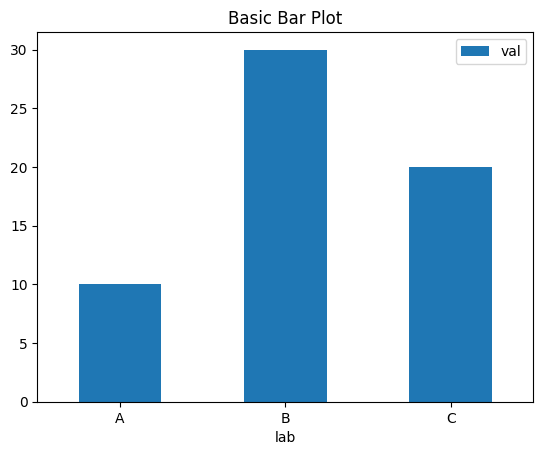

In [13]:
# Create a basic bar plot
ax = df.plot.bar(x='lab', y='val', rot=0, title='Basic Bar Plot')
plt.show()

In [14]:
# Create a DataFrame with animal data
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant', 'rabbit', 'giraffe', 'coyote', 'horse']
df_animals = pd.DataFrame({
    'speed': speed,
    'lifespan': lifespan
}, index=index)
print("Animals DataFrame:")
print(df_animals)

Animals DataFrame:
          speed  lifespan
snail       0.1       2.0
pig        17.5       8.0
elephant   40.0      70.0
rabbit     48.0       1.5
giraffe    52.0      25.0
coyote     69.0      12.0
horse      88.0      28.0


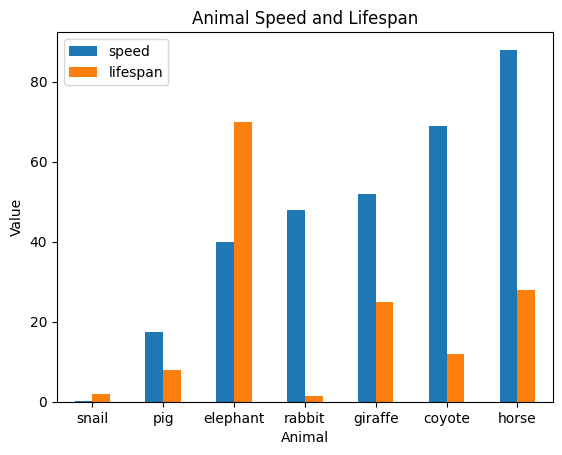

In [15]:
# Plot the entire DataFrame as a bar plot
ax = df_animals.plot.bar(rot=0, title='Animal Speed and Lifespan')
plt.xlabel('Animal')
plt.ylabel('Value')
plt.show()

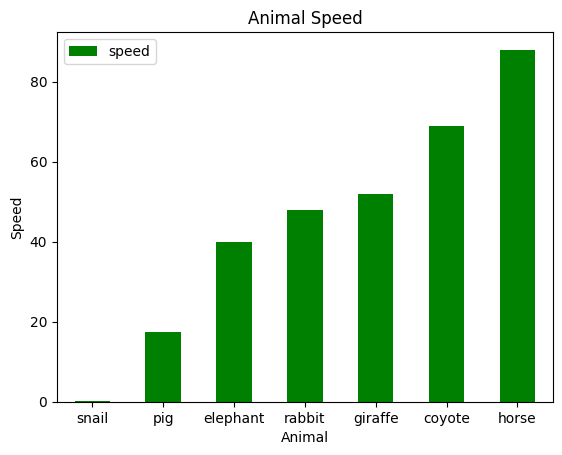

In [16]:
# Plot a single column
ax = df_animals.plot.bar(y='speed', rot=0, title='Animal Speed', color='green')
plt.xlabel('Animal')
plt.ylabel('Speed')
plt.show()

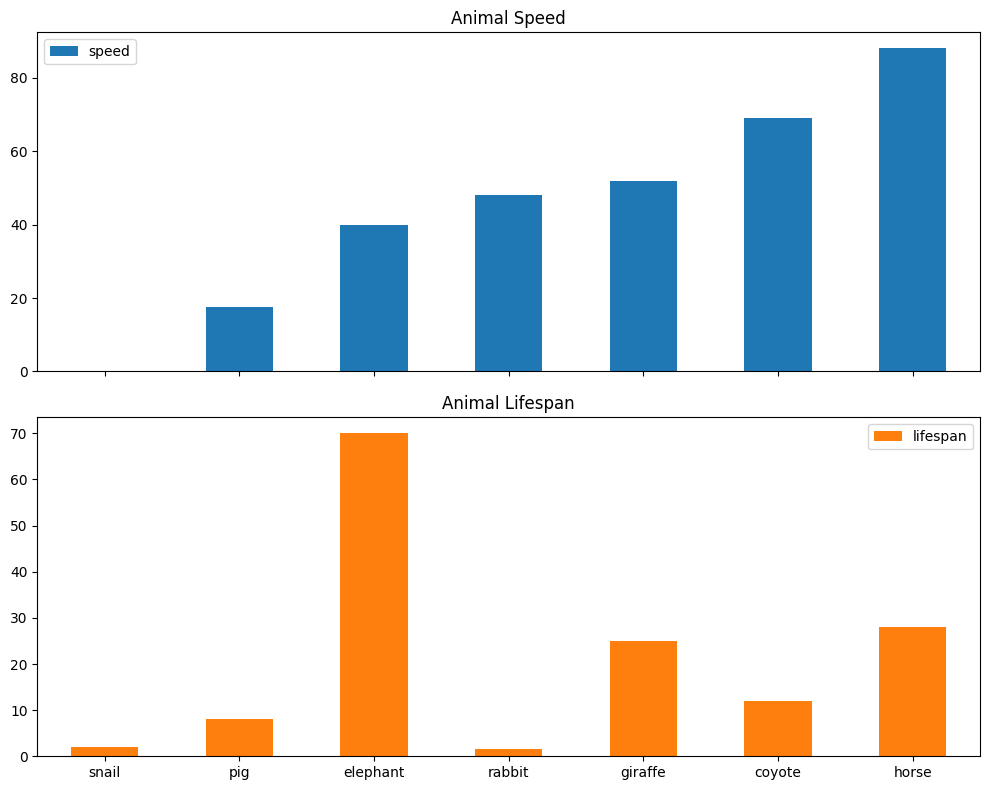

In [18]:
# Plot with subplots
axes = df_animals.plot.bar(rot=0, subplots=True, figsize=(10, 8), layout=(2, 1))

# When layout is specified, axes is a 2D array
# For a layout of (2, 1), access elements with axes[0,0] and axes[1,0]
axes[0, 0].set_title('Animal Speed')
axes[1, 0].set_title('Animal Lifespan')
plt.tight_layout()
plt.show()

### Horizontal Bar Plots

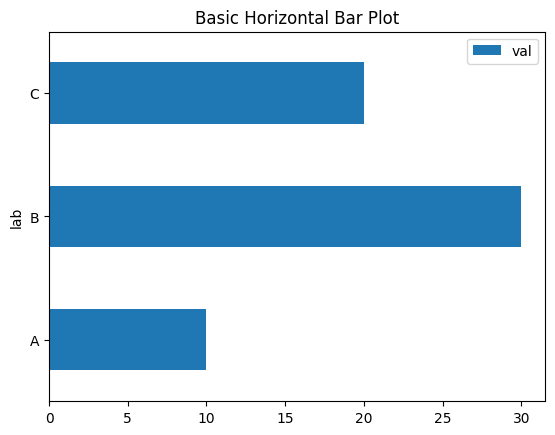

In [19]:
# Create a basic horizontal bar plot
ax = df.plot.barh(x='lab', y='val', title='Basic Horizontal Bar Plot')
plt.show()

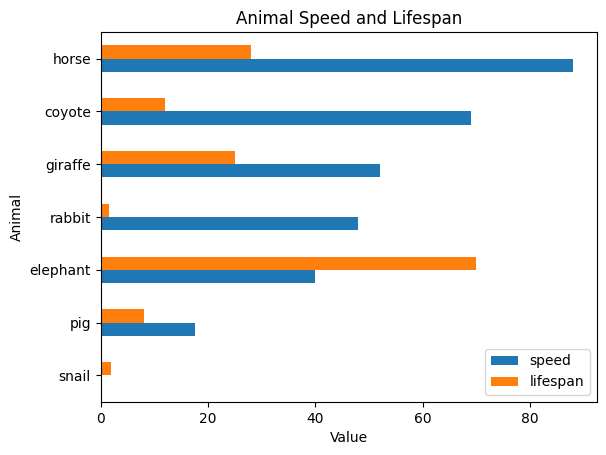

In [20]:
# Plot the entire DataFrame as a horizontal bar plot
ax = df_animals.plot.barh(title='Animal Speed and Lifespan')
plt.xlabel('Value')
plt.ylabel('Animal')
plt.show()

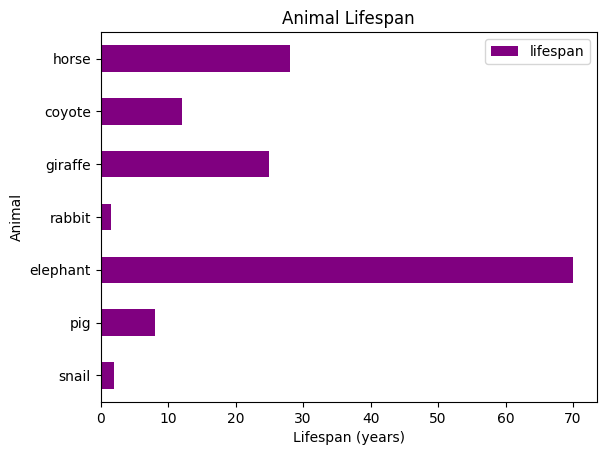

In [21]:
# Plot a single column
ax = df_animals.plot.barh(y='lifespan', title='Animal Lifespan', color='purple')
plt.xlabel('Lifespan (years)')
plt.ylabel('Animal')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

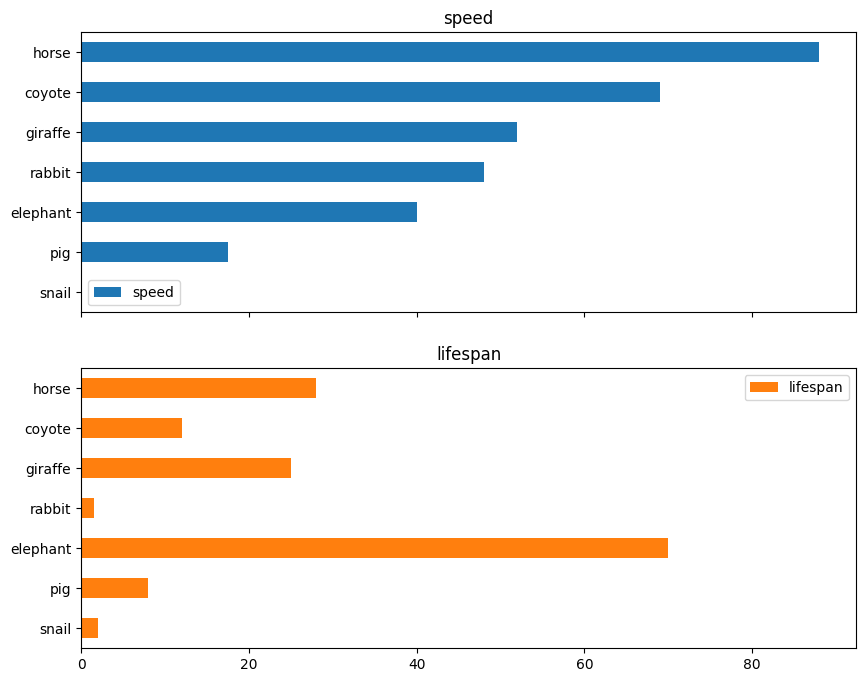

In [22]:
# Plot with subplots
axes = df_animals.plot.barh(subplots=True, figsize=(10, 8), layout=(2, 1))
axes[0].set_title('Animal Speed')
axes[1].set_title('Animal Lifespan')
plt.tight_layout()
plt.show()

### Customizing Bar Plots

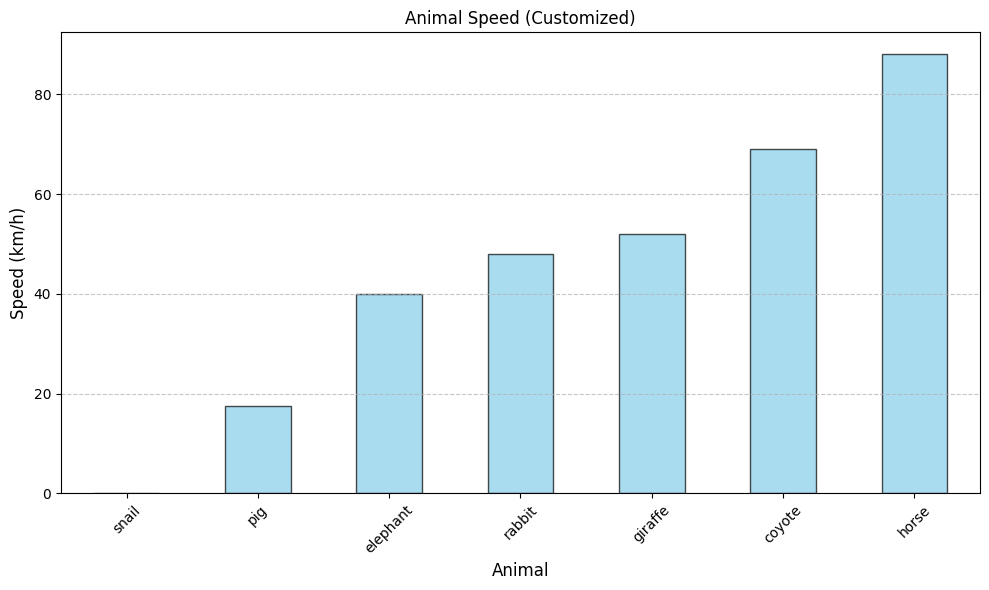

In [23]:
# Customized bar plot
ax = df_animals['speed'].plot.bar(
    rot=45,
    title='Animal Speed (Customized)',
    figsize=(10, 6),
    color='skyblue',
    edgecolor='black',
    alpha=0.7
)
plt.xlabel('Animal', fontsize=12)
plt.ylabel('Speed (km/h)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

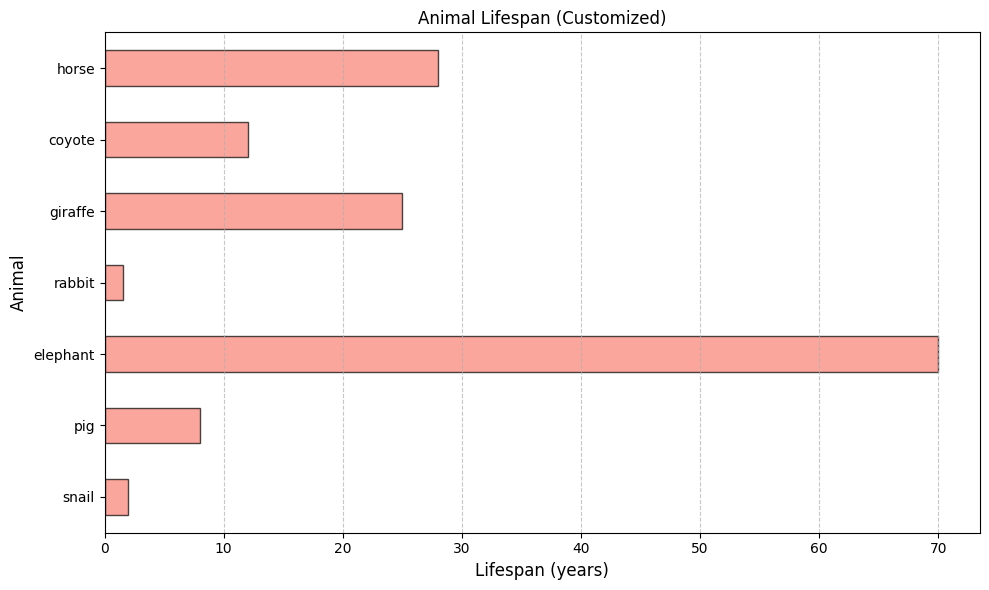

In [24]:
# Customized horizontal bar plot
ax = df_animals['lifespan'].plot.barh(
    title='Animal Lifespan (Customized)',
    figsize=(10, 6),
    color='salmon',
    edgecolor='black',
    alpha=0.7
)
plt.xlabel('Lifespan (years)', fontsize=12)
plt.ylabel('Animal', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Practical Example: Visualizing Genre Counts

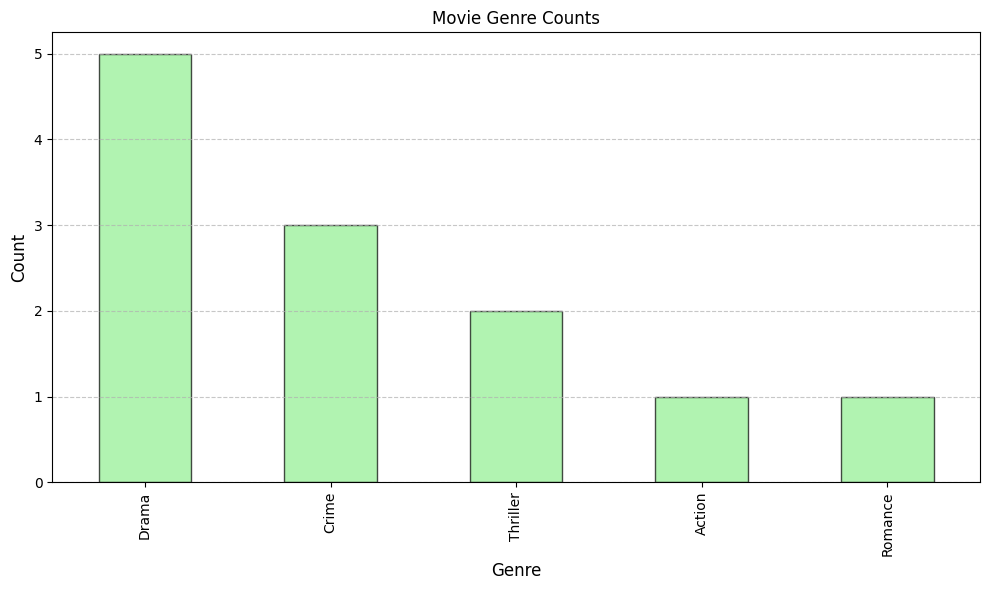

In [25]:
# Plot genre counts as a bar plot
ax = genre_counts.plot.bar(
    title='Movie Genre Counts',
    figsize=(10, 6),
    color='lightgreen',
    edgecolor='black',
    alpha=0.7
)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

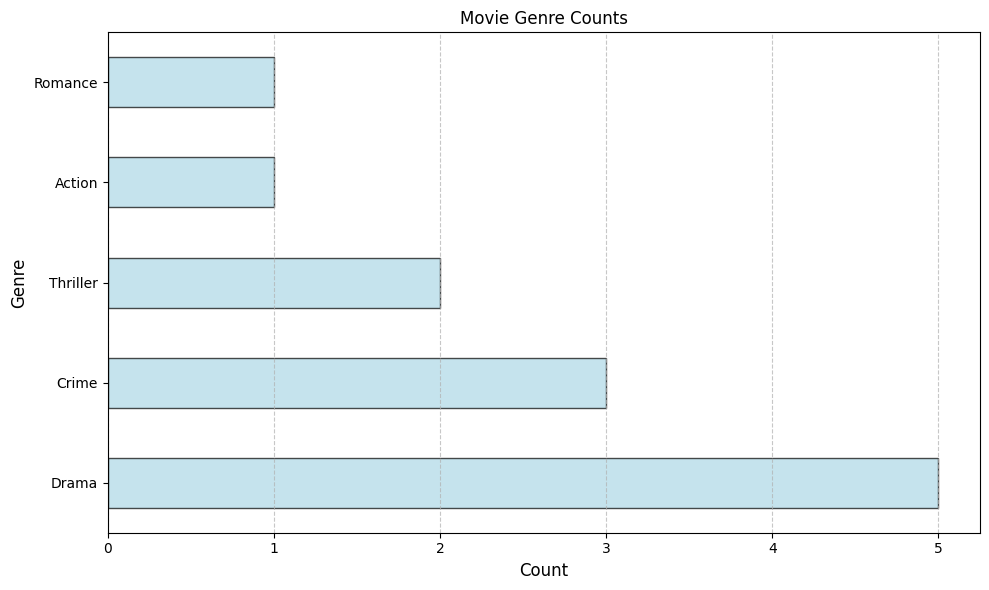

In [26]:
# Plot genre counts as a horizontal bar plot
ax = genre_counts.plot.barh(
    title='Movie Genre Counts',
    figsize=(10, 6),
    color='lightblue',
    edgecolor='black',
    alpha=0.7
)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Conclusion

In this notebook, we've explored:

1. `str.get_dummies()`: A powerful method for converting categorical string data with separators into dummy/indicator variables, which is useful for:
   - One-hot encoding of categorical variables
   - Handling multi-label data where each observation can belong to multiple categories
   - Preparing data for machine learning models

2. Pandas plotting capabilities, specifically bar and horizontal bar plots:
   - Creating basic bar plots with `plot.bar()`
   - Creating horizontal bar plots with `plot.barh()`
   - Customizing plots with various parameters
   - Creating subplots for multiple columns
   - Practical applications for data visualization

These tools are essential for data preprocessing and visualization in pandas, allowing for flexible and powerful operations on your data.